In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

from scipy import stats

In [4]:
from BooksSQL.Database import Database
import BooksSQL.common_queries as cq

In [3]:
all_books = cq.all_books()
books = cq.completed_books()
all_purchases = cq.all_purchases()
started = cq.started_reads()

# Corrects data types and slices data to look at only books finished in 2015 and beyond
all_purchases['purchase_date'] = pd.to_datetime(all_purchases['purchase_date'])
all_purchases['year_purchased'] = all_purchases["year_purchased"].astype("Int32")
books["started"] = pd.to_datetime(books["started"])
books["finished"] = pd.to_datetime(books["finished"])
books = books[(books["finished"].dt.year >= 2015)].copy()
started["started"] = pd.to_datetime(started["started"])

In [4]:
books

,book_id,title,genre,pages,format,year,author,started,finished,rating,source,imprint,translator,f_nf,year_read,month_read,days_to_finish
0,1,Uzumaki,horror,656.0,gn,2000,Junji Ito,NaT,2017-05-17,4.0,Right Stuf Anime,Viz Media,None,f,2017,May,NaN
1,2,The Shallows: What the Internet Is Doing to Ou...,technology,280.0,paperback,2010,Nicholas Carr,NaT,2017-10-01,4.0,Amazon,Norton,None,nf,2017,October,NaN
2,3,The Sixth Extinction: An Unnatural History,nature,336.0,hardcover,2014,Elizabeth Kolbert,NaT,2015-03-06,4.0,None,Henry Holt,None,nf,2015,March,NaN
3,4,The Name of the Wind (The Kingkiller Chronicle...,fantasy,662.0,hardcover,2007,Patrick Rothfuss,NaT,2017-02-28,4.0,Amazon,DAW,None,f,2017,February,NaN
4,5,"The Wise Man's Fear (The Kingkiller Chronicle,...",fantasy,994.0,hardcover,2011,Patrick Rothfuss,NaT,2017-03-13,5.0,Amazon,DAW,None,f,2017,March,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,827,Harry Potter and the Prisoner of Azkaban,fantasy,435.0,hardcover,1999,J.K. Rowling,2022-07-08,2022-07-10,4.0,Gift,Scholastic Press,None,f,2022,July,3.0
810,828,Harry Potter and the Goblet of Fire,fantasy,734.0,hardcover,2000,J.K. Rowling,2022-07-10,2022-07-15,5.0,Gift,Scholastic Press,None,f,2022,July,6.0
811,833,The Promise,general_fiction,270.0,paperback,2021,Damon Galgut,2022-07-23,2022-07-25,5.0,Skylight Books,Europa Editions,None,f,2022,July,3.0
812,829,Harry Potter and the Order of the Phoenix,fantasy,870.0,hardcover,2003,J.K. Rowling,2022-07-15,2022-07-29,4.0,Gift,Scholastic Press,None,f,2022,July,15.0


In [5]:
started_07_22 = started[(started["started"].dt.year == 2022) & (started["started"].dt.month == 7)].copy()

In [6]:
started_07_22[["title", "author", "format", "genre", "pages", "f_nf"]]

,title,author,format,genre,pages,f_nf
407,Harry Potter and the Sorcerer's Stone,J.K. Rowling,hardcover,fantasy,309,f
408,Harry Potter and the Chamber of Secrets,J.K. Rowling,hardcover,fantasy,341,f
409,Harry Potter and the Prisoner of Azkaban,J.K. Rowling,hardcover,fantasy,435,f
410,Harry Potter and the Goblet of Fire,J.K. Rowling,hardcover,fantasy,734,f
411,Harry Potter and the Order of the Phoenix,J.K. Rowling,hardcover,fantasy,870,f
412,The Promise,Damon Galgut,paperback,general_fiction,270,f
413,Harry Potter and the Half-Blood Prince,J.K. Rowling,paperback,fantasy,652,f
414,Speaking Bones,Ken Liu,hardcover,fantasy,1047,f


In [7]:
books_07_22 = books[(books['year_read'] == 2022) & (books['month_read'] == 'July')].copy()

In [8]:
books_07_22[["title", "author", "format", "genre", "pages", "rating", "f_nf"]]

,title,author,format,genre,pages,rating,f_nf
806,Blood of the Chosen,Django Wexler,paperback,fantasy,415.0,3.0,f
807,Harry Potter and the Sorcerer's Stone,J.K. Rowling,hardcover,fantasy,309.0,4.0,f
808,Harry Potter and the Chamber of Secrets,J.K. Rowling,hardcover,fantasy,341.0,4.0,f
809,Harry Potter and the Prisoner of Azkaban,J.K. Rowling,hardcover,fantasy,435.0,4.0,f
810,Harry Potter and the Goblet of Fire,J.K. Rowling,hardcover,fantasy,734.0,5.0,f
811,The Promise,Damon Galgut,paperback,general_fiction,270.0,5.0,f
812,Harry Potter and the Order of the Phoenix,J.K. Rowling,hardcover,fantasy,870.0,4.0,f


In [9]:
all_purchases[(all_purchases['year_purchased'] == 2022) & (all_purchases['month_purchased'] == 'July')][["title", "author", "source", "price"]]

,title,author,source,price
405,The Turn of the Key,Ruth Ware,Gift,0.00
406,The Promise,Damon Galgut,Skylight Books,16.71
407,Speaking Bones,Ken Liu,Skylight Books,27.91


In [10]:
def make_timeline():
    """Creates a custom axes to order the matplotlib visuals on"""
    month_order = [
        "January", "February", "March",
        "April", "May", "June",
        "July", "August", "September",
        "October", "November", "December"
    ]
    time_order = []
    for year in [str(year) for year in range(2015, datetime.today().year + 1)]:
        for month in month_order:
            time_order.append(month + " " + year)
    return time_order

def add_timeline(df):
    """Adds the timeline to df as a categorical variable"""
    timeline = make_timeline()
    df_timeline = df.copy()
    missing = ["August 2019", "September 2019", "November 2019", "November 2017"]
    
    keys = df_timeline["month_read"] + " " + df_timeline["year_read"].astype("str")
    
    df_timeline["timeline"] = pd.Categorical(
        keys,
        [key for key in timeline if key in np.append(keys.values, missing)],
        ordered=True
    )
    return df_timeline.sort_values(by="timeline")

def format_grouped_by_date(df, col, estimator):
    """Creates a grouped df with values aggregated on the passed value 'estimator'"""
    methods = {
        "count": pd.Series.count, 
        "mean": pd.Series.mean, 
        "max": pd.Series.max
    }
    return (
        add_timeline(df)[[col, "timeline"]]
        .groupby("timeline")[col]
        .apply(methods[estimator])
        .reset_index()
    )

def books_over_time(df, ax=None, show=False, pdf=None):
    """Plots the number of books read over time"""
    
    books_over_time = format_grouped_by_date(df, "title", "count")
    timeline = books_over_time["timeline"]
    x_vals = [label if label.startswith("January") else "" for label in timeline]
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(18,8))
    
    ax.plot(timeline, books_over_time["title"], marker="o")
    plt.xticks(range(len(x_vals)), x_vals, rotation=65, ha="right")
    plt.title("Number of Books Over Time")
    plt.xlabel("")
    plt.ylabel("Number of Books")
    plt.axhline(
        np.mean(books_over_time["title"]),
        label="Average books in a month: " + str(np.ceil(np.mean(books_over_time["title"]))),
        color="orange"
    )
    plt.axvline("October 2018", label="Move to Nor Cal", color="red", linestyle="--")
    plt.axvline("August 2020", label="Move to Missouri", color="orange", linestyle="--")
    plt.axvline("June 2017", label="Graduated From UCI", color="violet", linestyle="--")
    plt.axvline("July 2021", label="Move Back to California", color="teal", linestyle="--")
    plt.legend(loc=3)
    
    if pdf:
        pdf.savefig(bbox_inches="tight")
        plt.close("all")
    if show:
        plt.show()

def pages_read_over_time(df, ax=None, show=False, pdf=None):
    """Plots the total pages in books read over time"""
    
    pages_over_time = format_grouped_by_date(books, "pages", "mean")
    timeline = pages_over_time["timeline"]
    x_vals = [label if label.startswith("January") else "" for label in timeline]
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(18,8))
    ax.plot(timeline, pages_over_time["pages"], marker="o")
    plt.axis([-3, len(x_vals)+3, 0, 700])
    plt.xticks(range(len(x_vals)), x_vals, rotation=65, ha="right")
    plt.title("Average Pages Over Time")
    plt.xlabel("")
    plt.ylabel("Average Number of Pages")
    plt.axhline(
        np.mean(pages_over_time["pages"]), 
        label="Average pages in a month: " + str(np.ceil(np.mean(pages_over_time["pages"]))), 
        color="orange"
    )

    plt.axvline("October 2018", label="Move to Northern California", color="red", linestyle="--")
    plt.axvline("August 2020", label="Move to Missouri", color="orange", linestyle="--")
    plt.axvline("June 2017", label="Graduated from UCI", color="violet", linestyle="--")
    plt.axvline("July 2021", label="Move Back to California", color="teal", linestyle="--")
    plt.legend(loc=3)
    
    if pdf:
        pdf.savefig(bbox_inches="tight")
        plt.close("all")
    if show:
        plt.show()

def book_length_hist(df, ax=None, show=False, pdf=None):
    """Creates a histogram to demonstrate the distribution of book length (number of pages) across books read"""
    
    page_counts = df["pages"].dropna().copy()
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(18,8))
    ax.hist(page_counts, bins=30, alpha=0.7)
    
    plt.title("Book Lengths")
    plt.ylabel("Number of Books")
    plt.xlabel("Number of Pages")
    
    mean_pages = np.mean(page_counts)
    median_pages = np.median(page_counts)
    std_pages = np.std(page_counts)
    
    plt.axvline(mean_pages, color="orange", label=f"Average Number of Pages - {np.ceil(mean_pages)}")
    plt.axvline(median_pages, color="green", label=f"Median Page Count - {np.ceil(median_pages)}")
    plt.axvline(mean_pages + std_pages, linestyle="--", color="red", label=f"1 STD Away From Mean - {np.round(std_pages, 2)}")
    plt.axvline(mean_pages - std_pages, linestyle="--", color="red")
    plt.legend()
    
    if pdf:
        pdf.savefig(bbox_inches="tight")
        plt.close("all")
    if show:
        plt.show()
        
def make_seasons_table(df):
    """Creates a table that separates books based on which season they were finished in"""
    
    spring = ["March", "April", "May"]
    summer = ["June", "July", "August"]
    fall = ["September", "October", "November"]
    winter = ["December", "January", "February"]

    book_seasons = df.copy()

    book_seasons.loc[book_seasons["finished"].dt.month_name().isin(spring), "season"] = "spring"
    book_seasons.loc[book_seasons["finished"].dt.month_name().isin(summer), "season"] = "summer"
    book_seasons.loc[book_seasons["finished"].dt.month_name().isin(fall), "season"] = "fall"
    book_seasons.loc[book_seasons["finished"].dt.month_name().isin(winter), "season"] = "winter"
    
    return book_seasons

def books_by_season(df, ax=None, show=False, pdf=None):
    """Plots the number of books completed in each season of the year"""
    
    book_seasons = make_seasons_table(df)[["title", "season"]]
    counts_by_season = book_seasons.groupby("season")["title"].count().reset_index()
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(18,8))
    ax.bar(range(4), counts_by_season["title"])
    ax.set_xticks(range(4))
    ax.set_xticklabels(counts_by_season["season"])
    ax.set_title("Books By Season")
    ax.set_xlabel("")
    ax.set_ylabel("Number of Books")
    
    if pdf:
        pdf.savefig(bbox_inches="tight")
    if show:
        plt.show()

def pages_by_season(df, ax=None, show=False, pdf=None):
    """Plots the total number of pages read for books finished in each season of the year"""
    
    book_seasons = make_seasons_table(books)[["pages", "season"]]
    pages_by_season = book_seasons.groupby("season")["pages"].mean().reset_index()
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(18,8))
    ax.bar(range(4), pages_by_season["pages"])
    ax.set_xticks(range(4))
    ax.set_xticklabels(pages_by_season["season"], rotation=0)
    ax.set_title("Pages by Season")
    ax.set_xlabel("")
    ax.set_ylabel("Average Number of Pages")
    
    if pdf:
        pdf.savefig(bbox_inches="tight")
        plt.close("all")
    if show:
        plt.show()
    
def add_percent_f_nf(df):
    """Adds a column for the percent share of f (fiction) vs nf (non-fiction)"""
    
    f_nf = (
        df
        .copy()
        .groupby("f_nf")["title"]
        .count()
        .reset_index()
    )
    f_nf["pcts"] = f_nf["title"] / f_nf["title"].sum()
    return f_nf
    
def fiction_vs_nonfiction(df, ax=None, show=False, pdf=None):
    """Creates a donut chart to visualize completed fiction vs nonfiction books"""
    
    f_nf = add_percent_f_nf(df)
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(18,8))
    ax.pie(f_nf["pcts"], autopct="%0.1f%%", pctdistance=1.15, startangle=270, explode=[0.05,0])
    ax.pie(f_nf["pcts"], radius=0.8, colors=["white", "white"], explode=[0.05, 0], startangle=270, wedgeprops={"edgecolor": "white"})
    ax.axis("equal")
    ax.legend(f_nf["f_nf"])
    ax.set_title("Fiction / Nonfiction Proportions")
    
    if pdf:
        pdf.savefig(bbox_inches="tight")
        plt.close("all")
    if show:
        plt.show()

def add_pct_of_rating(df):
    """Adds the percentage of each rating category (1 - 5)"""
    
    ratings = (
        df[["title", "rating"]]
        .copy()
        .dropna()
        .groupby("rating")["title"]
        .count()
        .reset_index()
    )
    ratings["pct_of_total"] = ratings["title"] / ratings["title"].sum()
    return ratings

def rating_spread(df, ax=None, show=False, pdf=None):
    """Creates a donut chart to visualize the spread of ratings for books read"""
    
    ratings = add_pct_of_rating(df)
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(18,8))
    percents = ratings["pct_of_total"]
#     explode = [0, 0, 0, 0.1, 0.1]
#     ax.pie(percents, autopct="%0.1f%%", pctdistance=1.10, explode=explode, normalize=False)
#     ax.pie(percents, colors=["white"]*len(percents), radius=0.7, center=(0,0), explode=explode, wedgeprops={"edgecolor": "white"}, normalize=False)
    ax.pie(percents, autopct="%0.1f%%", pctdistance=1.10, normalize=False)
    ax.pie(percents, colors=["white"]*len(percents), radius=0.7, center=(0,0), wedgeprops={"edgecolor": "white"}, normalize=False)
    ax.legend(ratings["rating"])
    ax.set_title("Proportion of Ratings") # Using these instead of plt.title so that it stays with the axis in custom configs
    ax.axis("equal")
    if pdf:
        pdf.savefig(bbox_inches="tight")
        plt.close("all")
    if show:
        plt.show()
        
def group_by_genre(df):
    """Creates a grouped table with number of books read by genre"""
    
    return (
        df
        .copy()
        .dropna(subset=["genre"])
        .groupby("genre")["title"]
        .count()
        .reset_index()
        .sort_values(
            by="title",
            ascending=False
        )
    )

def books_by_genre(df, ax=None, show=False, pdf=None):
    """Plots the number of books by genre"""
    
    books_by_genre = group_by_genre(df)
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(18, 8))
    x_vals = range(len(books_by_genre["genre"]))
    ax.bar(x_vals, books_by_genre["title"])
    ax.set_xticks(x_vals)
    ax.set_xticklabels(books_by_genre["genre"],rotation=75, ha="right")
    ax.set_title("Books by Genre")
    ax.set_xlabel("")
    ax.set_ylabel("Number of Books")
    
    if pdf:
        pdf.savefig(bbox_inches="tight")
        plt.close("all")
    if show:
        plt.show()

def group_by_source(df):
    """Creates a grouped table with number of books read by source"""
    
    return (
        df
        .copy()
        .dropna(subset=["source"])
        .groupby("source")["title"]
        .count()
        .reset_index()
        .sort_values(
            by="title",
            ascending=False
        )
    )

def books_by_source(df, ax=None, show=False, pdf=None):
    """Plots the number of books read by source"""
    
    books_by_source = group_by_source(df)
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(18, 8))
    x_vals = range(len(books_by_source["source"]))
    ax.bar(x_vals, books_by_source["title"])
    ax.set_xticks(x_vals)
    ax.set_xticklabels(books_by_source["source"],rotation=75, ha="right")
    ax.set_title("Books by Source")
    ax.set_xlabel("")
    ax.set_ylabel("Number of Books")
    
    if pdf:
        pdf.savefig(bbox_inches="tight")
        plt.close("all")
    if show:
        plt.show()

def get_books_read_in_pub_year(df, year):
    """Returns all the books published in the passed year"""
    
    return df[
        (df["finished"].dt.year == year)
        & (df["year"] == year)
    ].copy()

def get_y_vals_by_year(df, year_list):
    """Returns the length of the bar for each year in year_list"""
    
    return [
        len(get_books_read_in_pub_year(df, year)) / len(df[df["finished"].dt.year == year])
        for year in year_list
    ]

def get_totals(df, year_list):
    """Returns the total books read in a year"""
    return [
        len(df[df["finished"].dt.year == year])
        for year in year_list
    ]

def top_bars(ax, y_vals, bar_range):
    """Plots the top bars of the visual, with bottom value set at hight of bottom bar"""
    
    ax.bar(range(bar_range), [1-y_val for y_val in y_vals], bottom=y_vals, label="Backlog")

def current_releases(df, ax=None, show=False, pdf=None):
    """
    Plots the proportion of books that were read in the same year they were published vs those
    that were read in years after their publication date
    """
    x_vals = [str(year) for year in df['year_read'].unique() if year >= 2015]
    x_val_count = len(x_vals)
    year_list = list(map(int, x_vals))
    y_vals = get_y_vals_by_year(df, year_list)
    
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(18, 8))
    
    ax.bar(range(x_val_count), y_vals, label="Read in Year Pubbed")
    
    for idx, value in enumerate(y_vals):
        ax.text(
            idx, 
            value+0.025, 
            str(round(value*100, 2)) + "%",
            horizontalalignment="center", 
            fontweight="bold", 
            fontsize=14
        )
    totals = get_totals(df, year_list)
    for idx, value in enumerate(totals):
        ax.text(idx, 0.8, "Total\nBooks:\n"+ str(value), horizontalalignment="center", fontweight="bold")
    top_bars(ax, y_vals, x_val_count)
    ax.set_xticks(range(x_val_count))
    ax.set_xticklabels(x_vals)
    ax.set_title("Books Read in Year of Publication")
    ax.set_ylabel("Proportion of Books")
    ax.set_xlabel("")
    ax.legend()
    
    if pdf:
        pdf.savefig(bbox_inches="tight")
        plt.close("all")
    if show:
        plt.show()
        
def books_by_year(df, ax=None, show=False, pdf=None):
    """Plots the total number of books read in each year to compare with average"""
    
    x_values = [str(year) for year in df['year_read'].unique() if year >= 2015]
    x_val_count = len(x_values)
    year_list = list(map(int, x_values))
    totals = get_totals(df, year_list)
    mean_totals = round(np.mean(totals), 2)
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(18, 8))
    ax.bar(range(x_val_count), totals)
    ax.set_xticks(range(x_val_count))
    ax.set_xticklabels(x_values)
    plt.axhline(mean_totals, label=f"Avg Per Year - {mean_totals}")
    ax.set_title("Totals Per Year")
    ax.set_ylabel("Number of Books")
    ax.set_xlabel("")
    ax.legend()
    
    if pdf:
        pdf.savefig(bbox_inches="tight")
        plt.close("all")
    if show:
        plt.show()
        
def group_by_format(df):
    """Creates a grouped table with number of books read by format"""
    
    return (
        df[~df["finished"].isna()]
        .copy()
        .groupby("format")["title"]
        .count()
        .reset_index()
        .sort_values(by="title", ascending=False)
    )

def books_by_format(df, ax=None, show=False, pdf=None):
    """Plots the number of books read by format"""
    
    books_by_format = group_by_format(df)
    x_vals = books_by_format["format"]
    y_vals = books_by_format["title"]
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(18, 8))
    ax.bar(range(len(x_vals)), y_vals)
    ax.set_xticks(range(len(x_vals)))
    ax.set_xticklabels(x_vals)
    ax.set_title("Book by Format")
    plt.xlabel("")
    plt.ylabel("Number of Books")
    
    if pdf:
        pdf.savefig(bbox_inches="tight")
        plt.close("all")
    if show:
        plt.show()

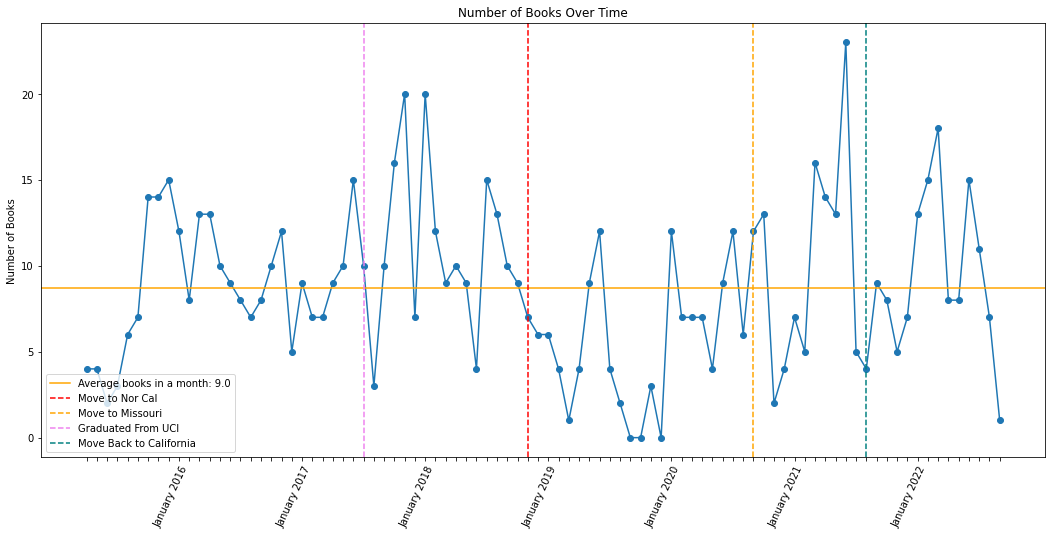

In [11]:
# plt.figure(figsize=(18, 8))
# ax = plt.subplot(122)
books_over_time(books,  show=True)

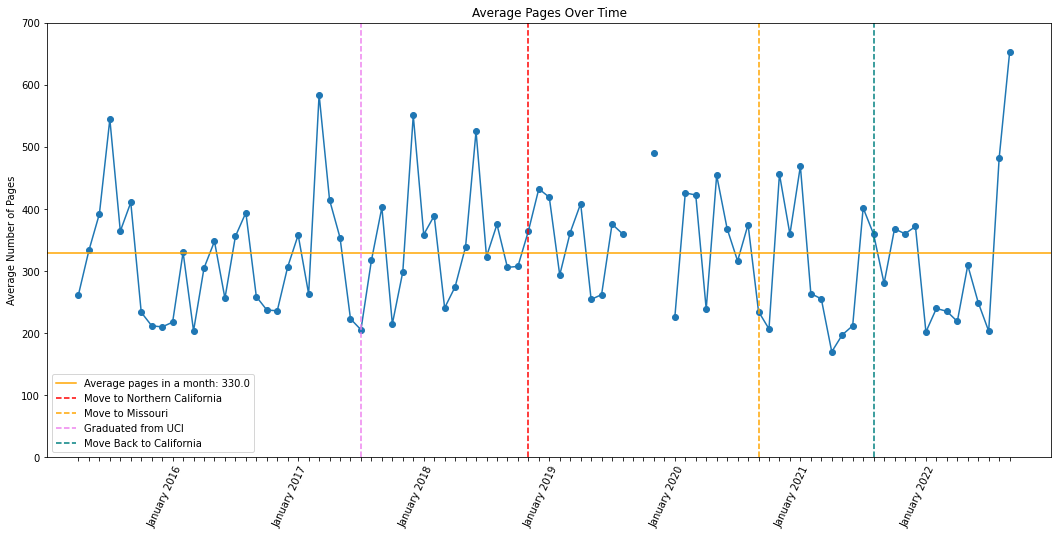

In [12]:
# ax = plt.subplot(111)
pages_read_over_time(books, show=True)

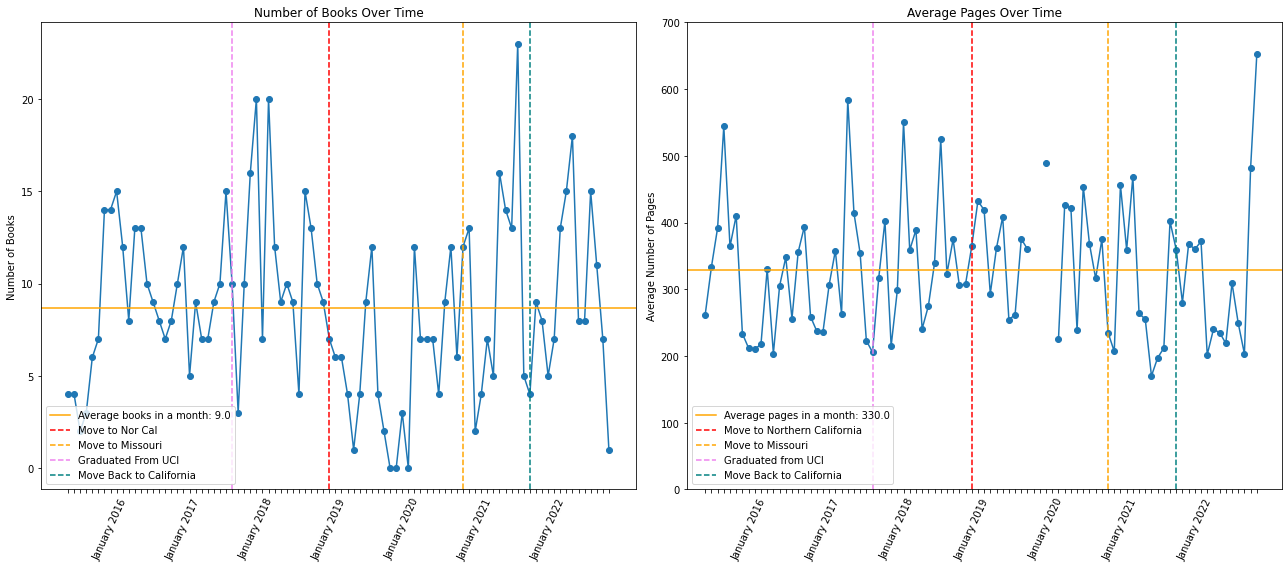

In [13]:
plt.figure(figsize=(18, 8))
ax1 = plt.subplot(121)
books_over_time(books, ax1)

ax2 = plt.subplot(122)
pages_read_over_time(books, ax2)
plt.tight_layout()
plt.show()

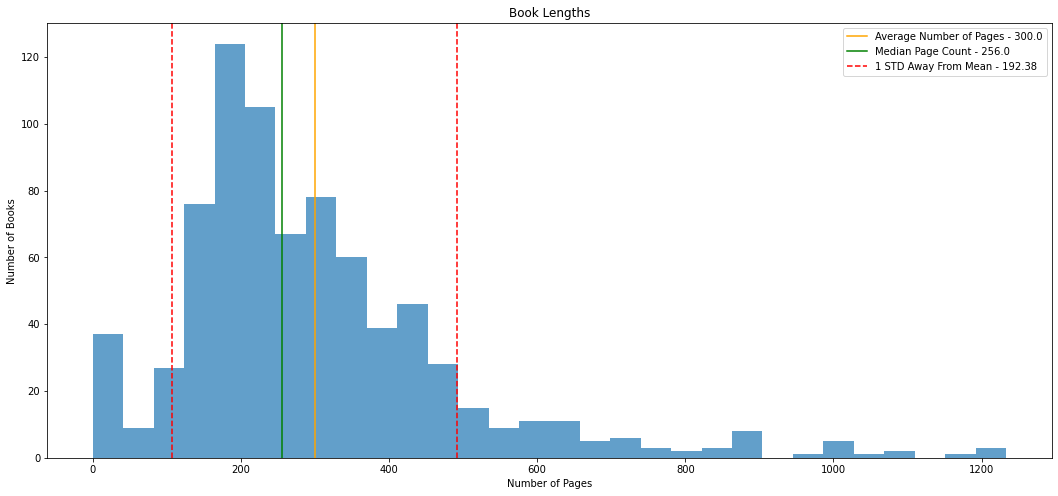

In [14]:
# plt.figure(figsize=(18, 8))
# ax = plt.subplot(121)
book_length_hist(books, show=True)

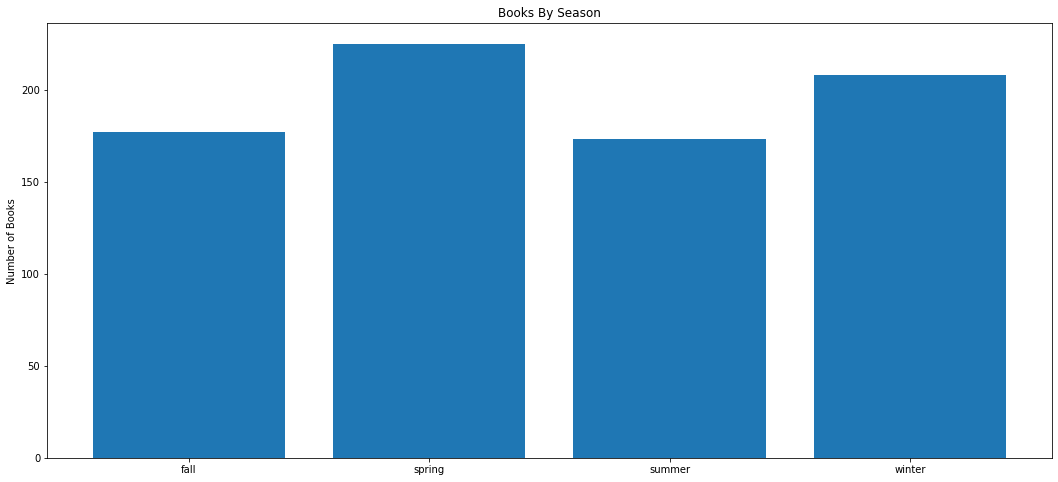

In [15]:
# plt.figure(figsize=(18,8))
books_by_season(books, show=True)

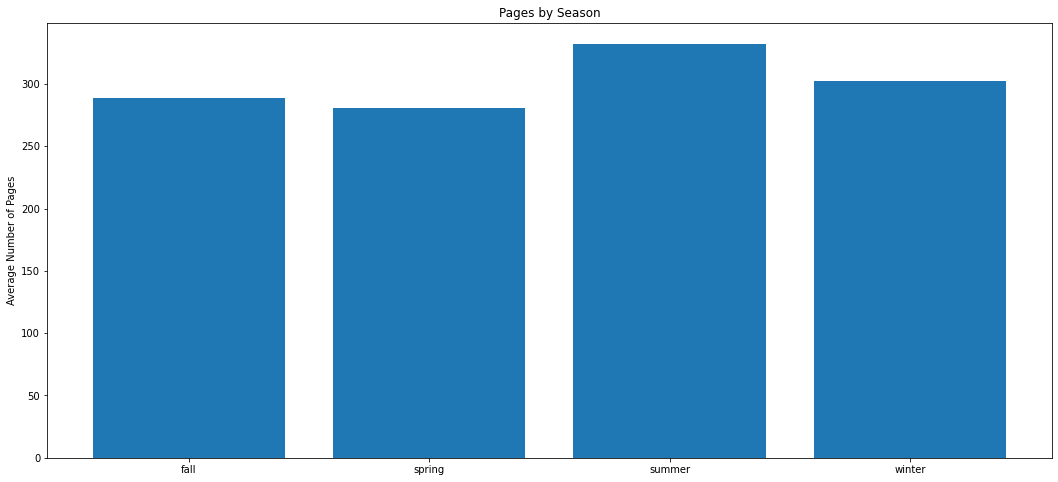

In [16]:
# plt.figure(figsize=(18, 8))
pages_by_season(books, show=True)

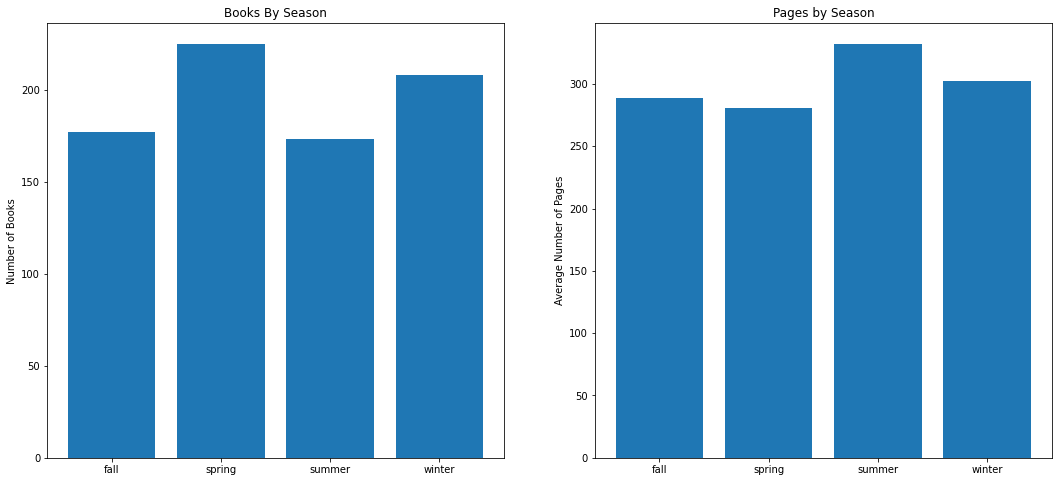

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
books_by_season(books, ax=ax[0])
pages_by_season(books, ax=ax[1])
plt.show()

ValueError: 'explode' must be of length 'x'

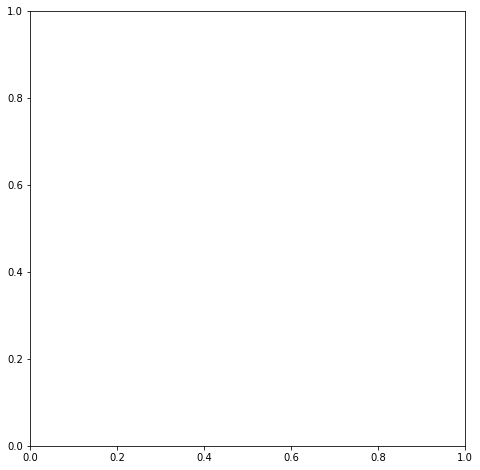

In [19]:
fiction_vs_nonfiction(books_07_22, show=True)

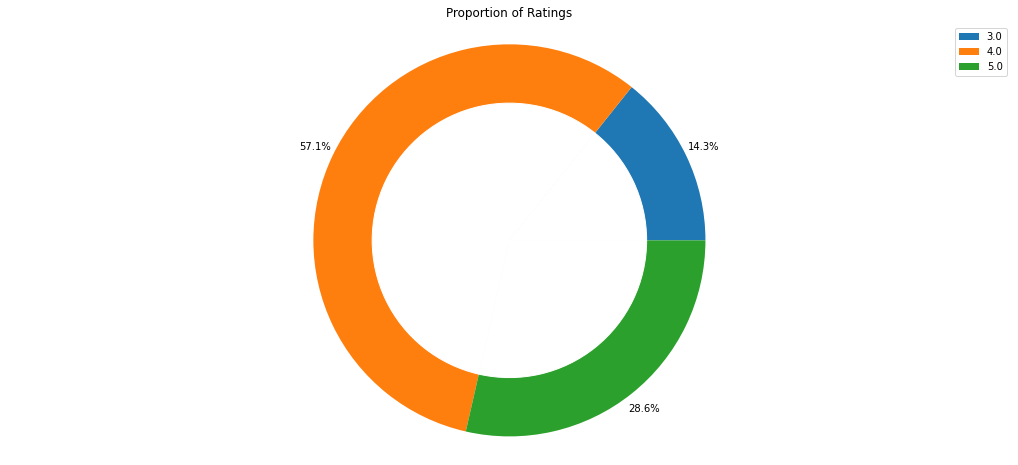

In [20]:
rating_spread(books_07_22, show=True)

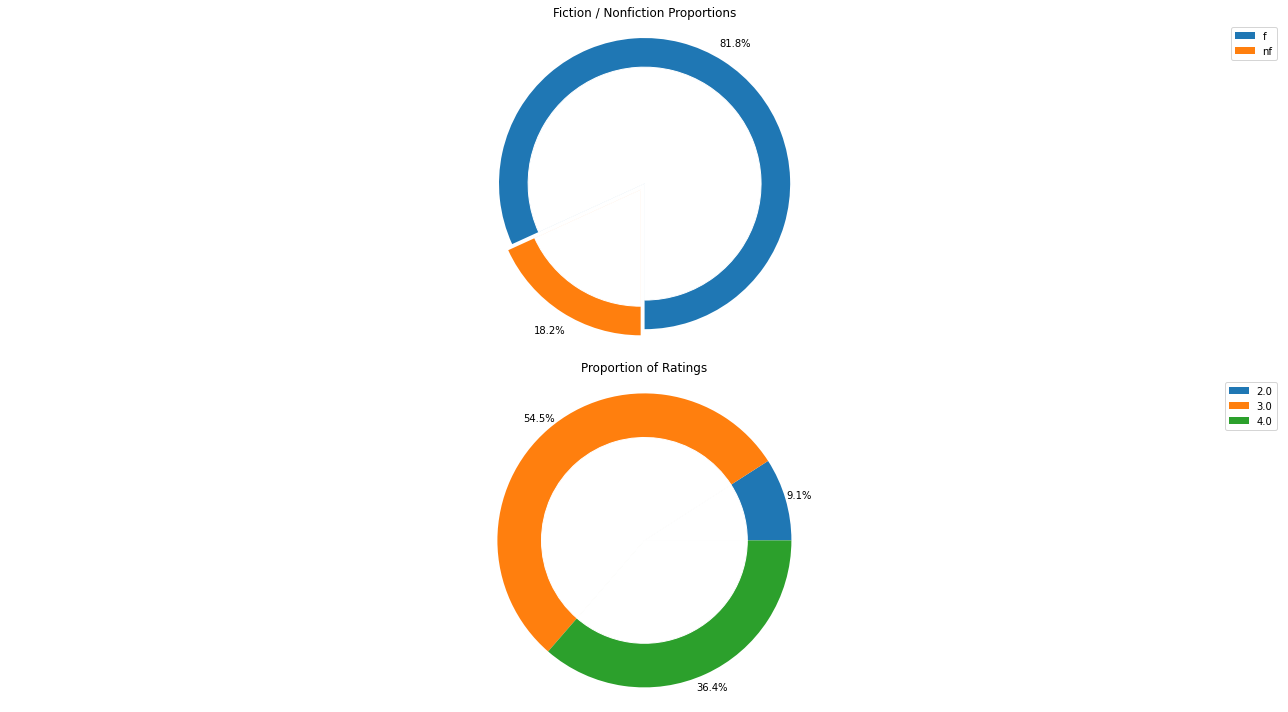

In [20]:
fig, axs = plt.subplots(2, 1, figsize=(18,10))
fiction_vs_nonfiction(books_06_22, ax=axs[0])
rating_spread(books_06_22, ax=axs[1])
plt.tight_layout()
plt.show()

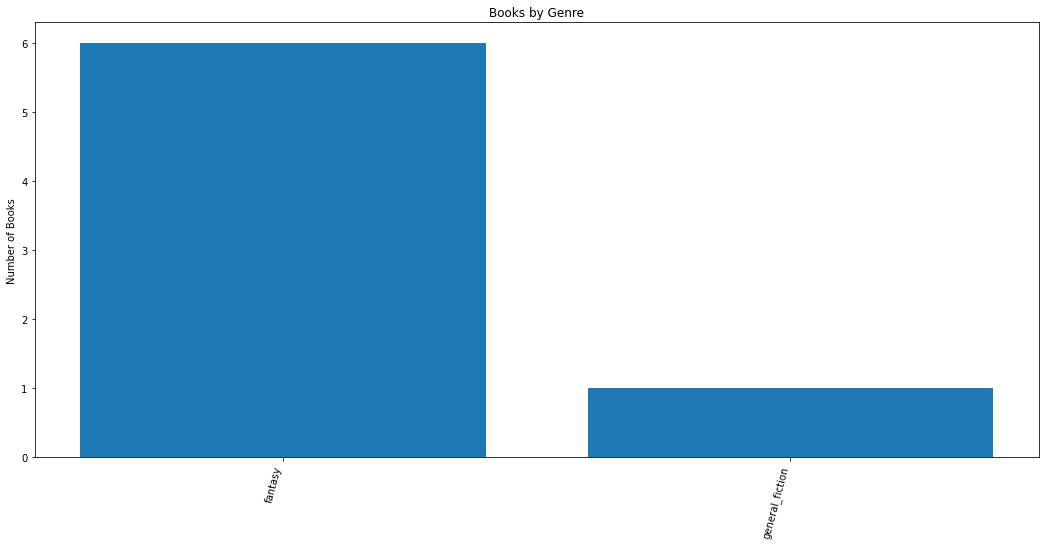

In [21]:
books_by_genre(books_07_22, show=True)

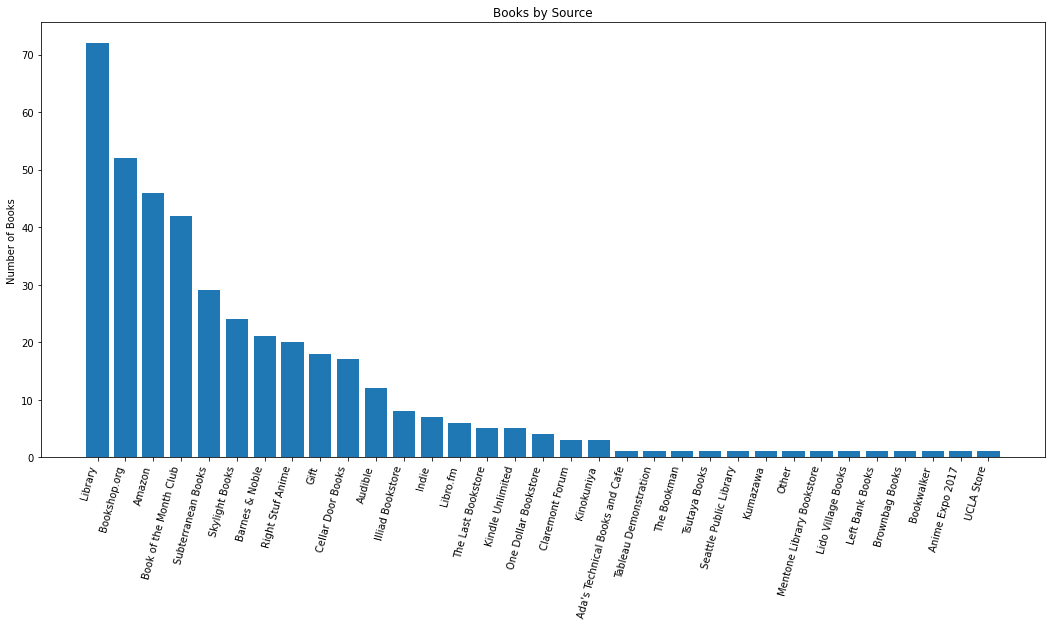

In [22]:
books_by_source(all_purchases)

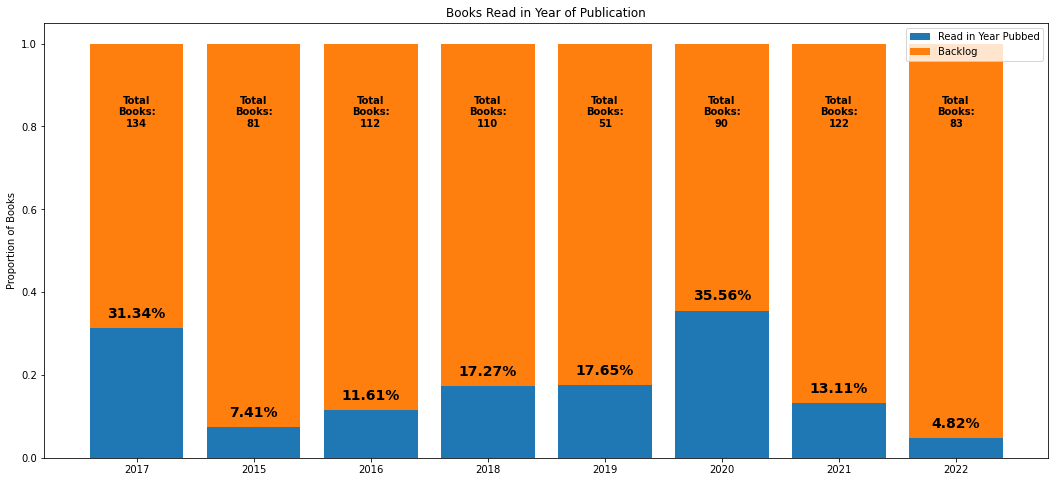

In [23]:
current_releases(books, show=True)

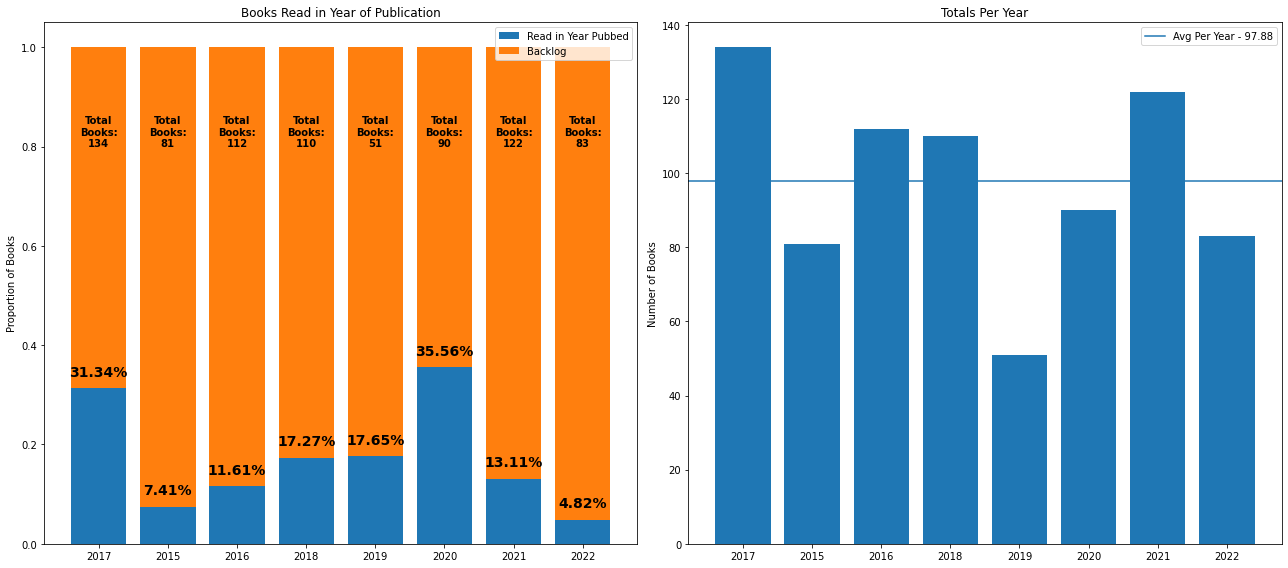

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
current_releases(books, ax=axs[0])
books_by_year(books, ax=axs[1])
plt.tight_layout()
plt.show()

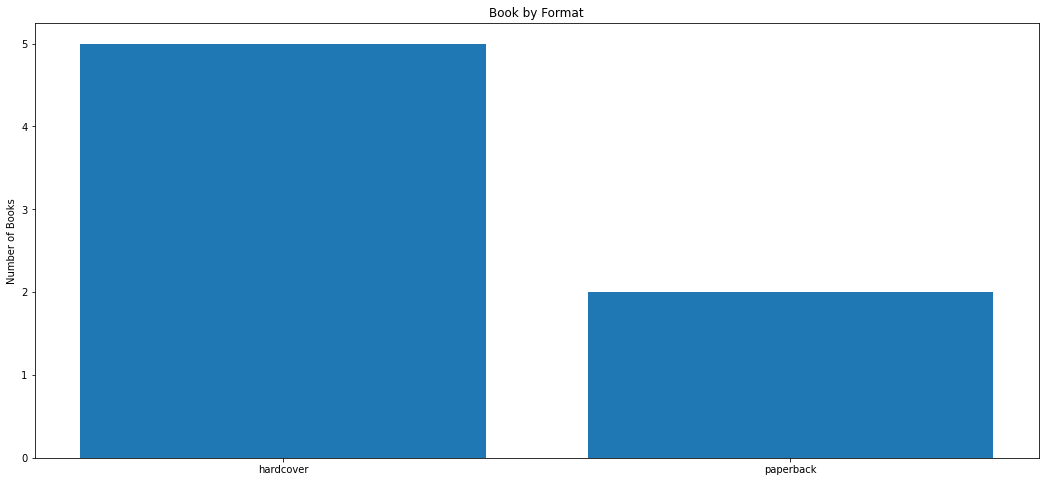

In [25]:
books_by_format(books_07_22, show=True)

In [26]:
def reading_speed_kde(df):
    """Creates a KDE plot to show distribution of reading speed across all days_to_finish values"""
    
    squared_df = df.copy()
    plt.close("all")
    plt.figure(figsize=(12, 8))
    sns.kdeplot(data=squared_df, x="days_to_finish", shade=True)
    mean_days = np.mean(df["days_to_finish"])
    median_days = np.median(df[["days_to_finish"]].dropna()["days_to_finish"])
    mode_days, mode_counts = stats.mode(df[["days_to_finish"]].dropna()["days_to_finish"])
    std_days = np.std(df["days_to_finish"])
    plt.axvline(mean_days, label=f"Mean Days to Finish a Book - {np.round(mean_days, 1)}", color="red", linestyle="--")
    plt.axvline(median_days, label=f"Median Days to Finish a Book - {median_days}", color="green", linestyle="--")
    plt.axvline(mode_days, label=f"Mode Days to Finish a Book - {mode_days[0]}", color="violet", linestyle="--")
    plt.axvline(mean_days + std_days, label="1 std away", color="orange", linestyle="--")
    plt.xlim([0, int(df["days_to_finish"].max())+10])
    plt.legend()
#     pdf_test.savefig()
    plt.show()

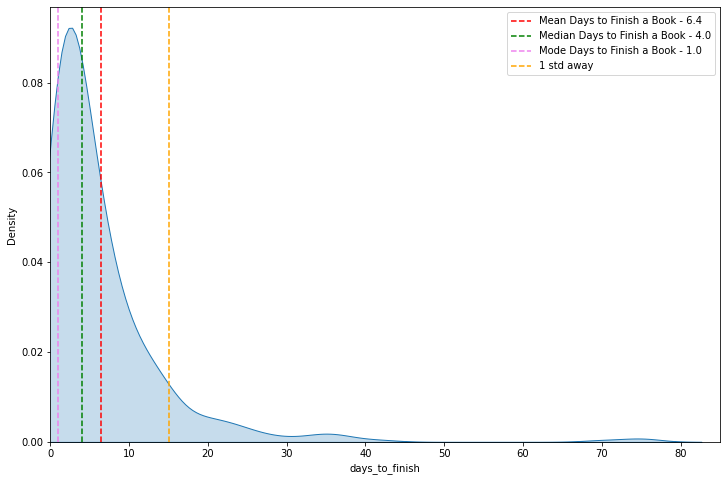

In [27]:
reading_speed_kde(books)